<a href="https://colab.research.google.com/github/Omocliff/3MTT/blob/main/covid19_capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Case Scenario**

In response to the COVID-19 pandemic, public health organizations have faced
immense challenges in predicting the spread of the virus and understanding key
factors that influence transmission and patient outcomes. I have been
hired as a data scientist by a public health organization, "HealthGuard Analytics," to
build a predictive modeling system. The organization requires actionable insights to
inform policies, anticipate future outbreaks, and improve health resource allocation.

Using historical COVID-19 data, I will conduct data cleaning, perform exploratory
data analysis (EDA), and develop predictive models to forecast COVID-19 trends.

Findings will be presented through visualizations and a final report
summarizing insights and recommendations for public health responses.


**Objectives of the Project**
1. to develop actionable insights to inform policies.
2. to develop insights that would anticipate future outbreak.
3. to develop insights that would improve health resource allocation.
4. to build a predictive modelling system.

In [ ]:
# to load dataset into a panda dataframe and display dataframe

import pandas as pd
full_grouped_df = pd.read_csv('/content/drive/MyDrive/COVID19_DATA/full_grouped.csv')
full_grouped_df.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [ ]:
# to check for basic decription of dataset

full_grouped_df.describe()



,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
count,3.515600e+04,35156.000000,3.515600e+04,3.515600e+04,35156.00000,35156.000000,35156.000000
mean,2.356663e+04,1234.068239,1.104813e+04,1.128443e+04,469.36375,18.603339,269.315593
std,1.499818e+05,7437.238354,6.454640e+04,8.997149e+04,3005.86754,115.706351,2068.063852
min,0.000000e+00,0.000000,0.000000e+00,-2.000000e+00,0.00000,-1918.000000,-16298.000000
25%,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000
50%,2.500000e+02,4.000000,3.300000e+01,8.500000e+01,2.00000,0.000000,0.000000
75%,3.640250e+03,78.250000,1.286250e+03,1.454000e+03,75.00000,1.000000,20.000000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,77255.00000,3887.000000,140050.000000


In [ ]:
# to check for accuracy of datatype

full_grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB


In [ ]:
# to check for dublicate data

full_grouped_df.duplicated().sum()

0

In [ ]:
# to drop dulicate data

full_grouped_df.drop_duplicates(inplace=True)

In [ ]:
# to check for skewness of 'confirmed' columns

full_grouped_df['Confirmed'].skew()

15.714609194142797

In [ ]:
# to check for skewness of 'Active' column

full_grouped_df['Active'].skew()

18.854070512693472

In [ ]:
# to check for skewness of 'New death' column

full_grouped_df['New deaths'].skew()

11.620631614762328

In [ ]:
# to replace all hegative values with NaN

import numpy as np

full_grouped_df['Active'] = full_grouped_df['Active'].apply(lambda x: np.nan if x < 0 else x)
full_grouped_df['New deaths'] = full_grouped_df['New deaths'].apply(lambda x: np.nan if x < 0 else x)
full_grouped_df['New recovered'] = full_grouped_df['New recovered'].apply(lambda x: np.nan if x < 0 else x)

In [ ]:
# to convert to datetime datatype
full_grouped_df['Date'] = pd.to_datetime(full_grouped_df['Date'])
full_grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            35156 non-null  datetime64[ns]
 1   Country/Region  35156 non-null  object        
 2   Confirmed       35156 non-null  int64         
 3   Deaths          35156 non-null  int64         
 4   Recovered       35156 non-null  int64         
 5   Active          35154 non-null  float64       
 6   New cases       35156 non-null  int64         
 7   New deaths      35118 non-null  float64       
 8   New recovered   35079 non-null  float64       
 9   WHO Region      35156 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(2)
memory usage: 2.7+ MB


In [ ]:
full_grouped_df.isna().sum()

,0
Date,0
Country/Region,0
Confirmed,0
Deaths,0
Recovered,0
Active,2
New cases,0
New deaths,38
New recovered,77
WHO Region,0


In [ ]:
# to check for missing values

full_grouped_df.isnull()


,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
35151,False,False,False,False,False,False,False,False,False,False
35152,False,False,False,False,False,False,False,False,False,False
35153,False,False,False,False,False,False,False,False,False,False
35154,False,False,False,False,False,False,False,False,False,False


In [ ]:
# fill missing values with median

full_grouped_df['Active'].fillna(full_grouped_df['Active'].median(), inplace=True)
full_grouped_df['New deaths'].fillna(full_grouped_df['New deaths'].median(), inplace=True)
full_grouped_df['New recovered'].fillna(full_grouped_df['New recovered'].median(), inplace=True)

<ipython-input-16-55ccb52c0a32>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  full_grouped_df['Active'].fillna(full_grouped_df['Active'].median(), inplace=True)
<ipython-input-16-55ccb52c0a32>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

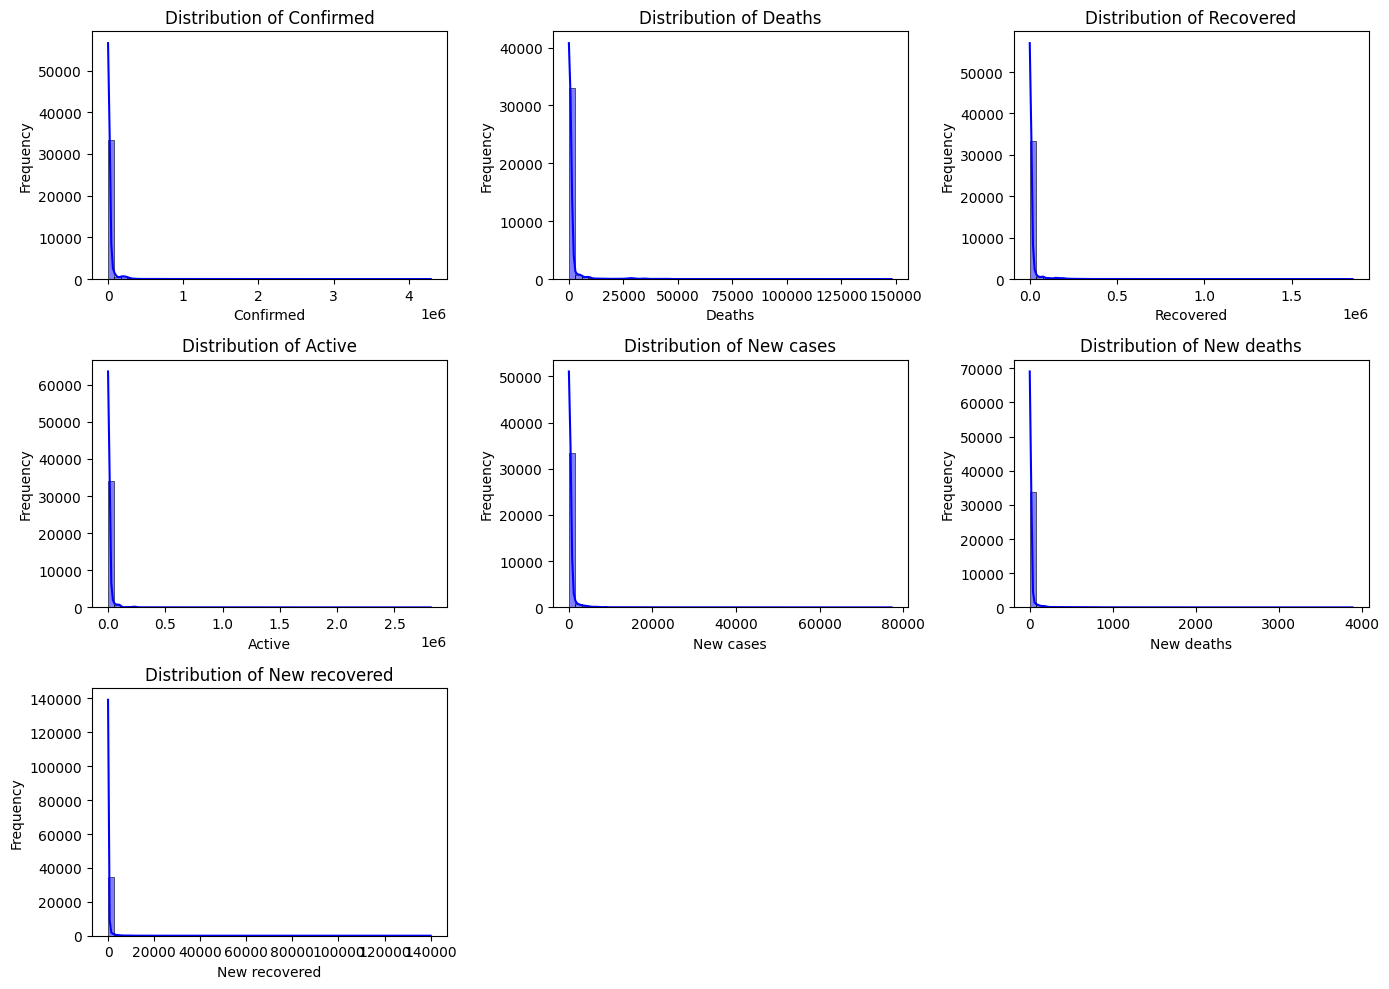

In [ ]:
# to check for distribution of the numeric columns to graphically verify skewness

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# List of numerical columns in the dataset
numerical_columns = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered']

# to plot histogram of numeric columns

plt.figure(figsize=(14, 10))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(full_grouped_df[col], kde=True, color = 'blue', bins = 50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Observation from dataset**

The dataset contains 35156 non-null values. This implies that there is no missing value in the dataset.

After loading the full_grouped dataset, it was observed that the columns for 'Active', 'New deaths' and 'New recovered', contain negative values. And they all have numeric data. The data also shows that the numeric columns are highly right skewed.


There would be need to clean the dataset of these negative values.

In [ ]:
full_grouped_df.describe()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
count,35156,3.515600e+04,35156.000000,3.515600e+04,3.515600e+04,35156.00000,35156.000000,35156.000000
mean,2020-04-24 12:00:00,2.356663e+04,1234.068239,1.104813e+04,1.128443e+04,469.36375,18.668051,270.482620
min,2020-01-22 00:00:00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000
25%,2020-03-08 18:00:00,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000
50%,2020-04-24 12:00:00,2.500000e+02,4.000000,3.300000e+01,8.500000e+01,2.00000,0.000000,0.000000
75%,2020-06-10 06:00:00,3.640250e+03,78.250000,1.286250e+03,1.454000e+03,75.00000,1.000000,20.000000
max,2020-07-27 00:00:00,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,77255.00000,3887.000000,140050.000000
std,NaN,1.499818e+05,7437.238354,6.454640e+04,8.997149e+04,3005.86754,115.236717,2064.310734


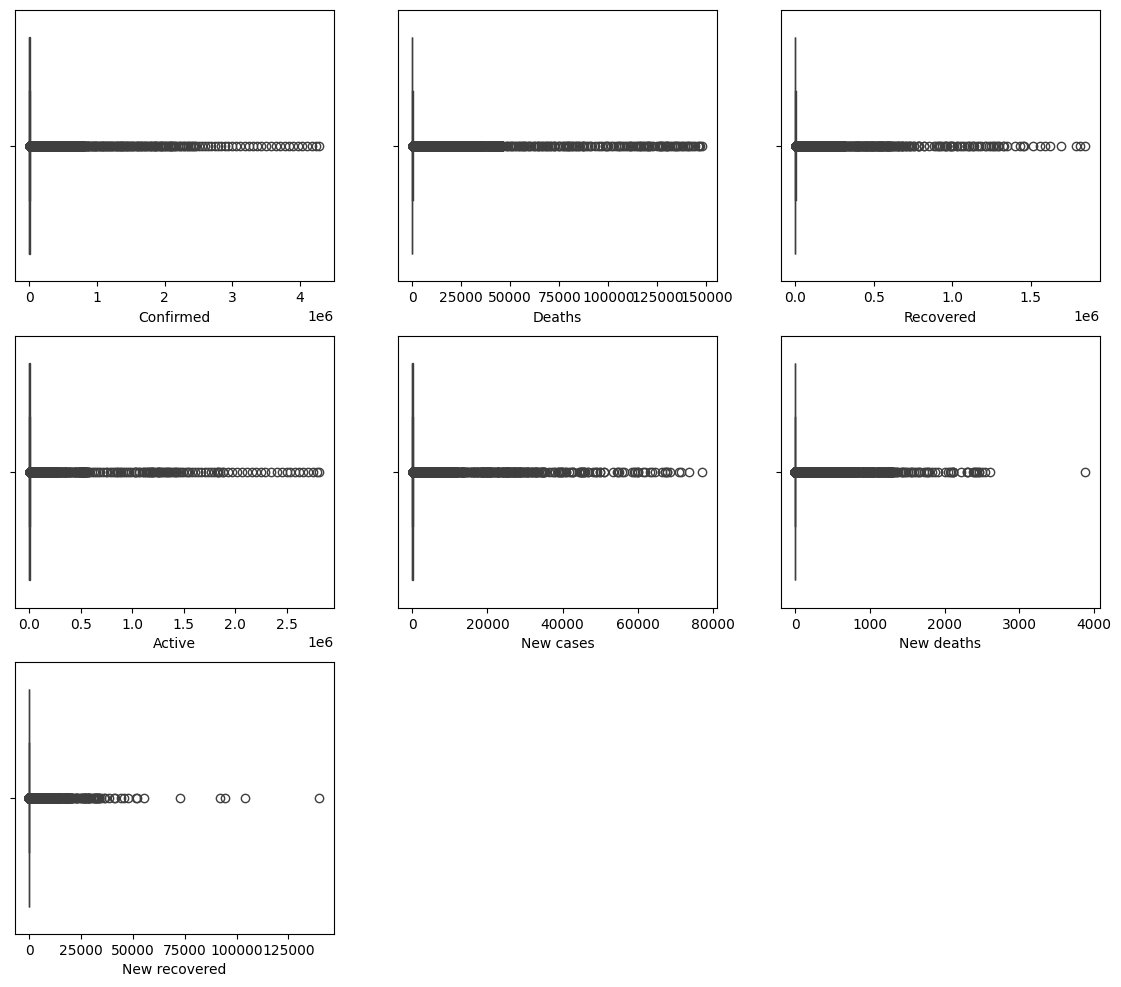

In [ ]:
# to visualise outliers using box plot for numeric variables

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,12))


for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=full_grouped_df[col])
    plt.xlabel(col)

plt.tight_layout
plt.show()




The Box plot suggests that there are extreme values(possibly outliers) contained in recovered, new cases, new deaths, and new recovered.

---



In [ ]:
full_grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            35156 non-null  datetime64[ns]
 1   Country/Region  35156 non-null  object        
 2   Confirmed       35156 non-null  int64         
 3   Deaths          35156 non-null  int64         
 4   Recovered       35156 non-null  int64         
 5   Active          35156 non-null  float64       
 6   New cases       35156 non-null  int64         
 7   New deaths      35156 non-null  float64       
 8   New recovered   35156 non-null  float64       
 9   WHO Region      35156 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(2)
memory usage: 2.7+ MB


<ipython-input-21-af42939694b6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Confirmed', y='Country/Region', data=top_10_countries, palette= 'Blues_d')


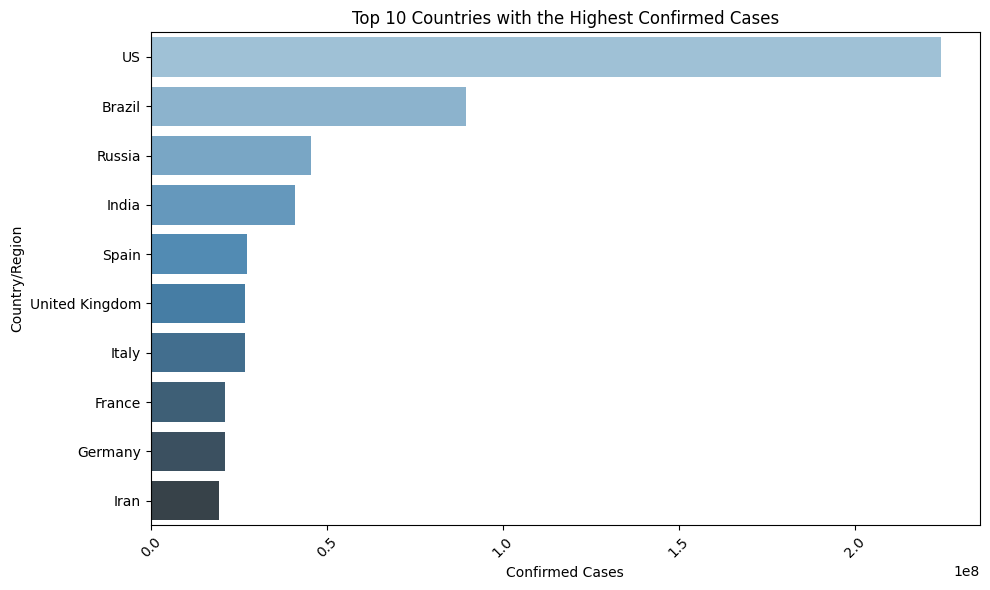

In [ ]:
# to visualise top ten countries with the highest confirmed cases

country_stats = full_grouped_df.groupby('Country/Region')[numerical_columns].sum().reset_index()
top_10_countries = country_stats.sort_values(by='Confirmed', ascending=False).head(10)
top_10_countries

plt.figure(figsize=(10, 6))
sns.barplot(x='Confirmed', y='Country/Region', data=top_10_countries, palette= 'Blues_d')
plt.title('Top 10 Countries with the Highest Confirmed Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Country/Region')
plt.xticks(rotation=45)
plt.tight_layout()
#plt.show()



<ipython-input-23-41ff35e3b2c7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Confirmed', y='WHO Region', data=who_regions_stats, palette= 'Blues_d')


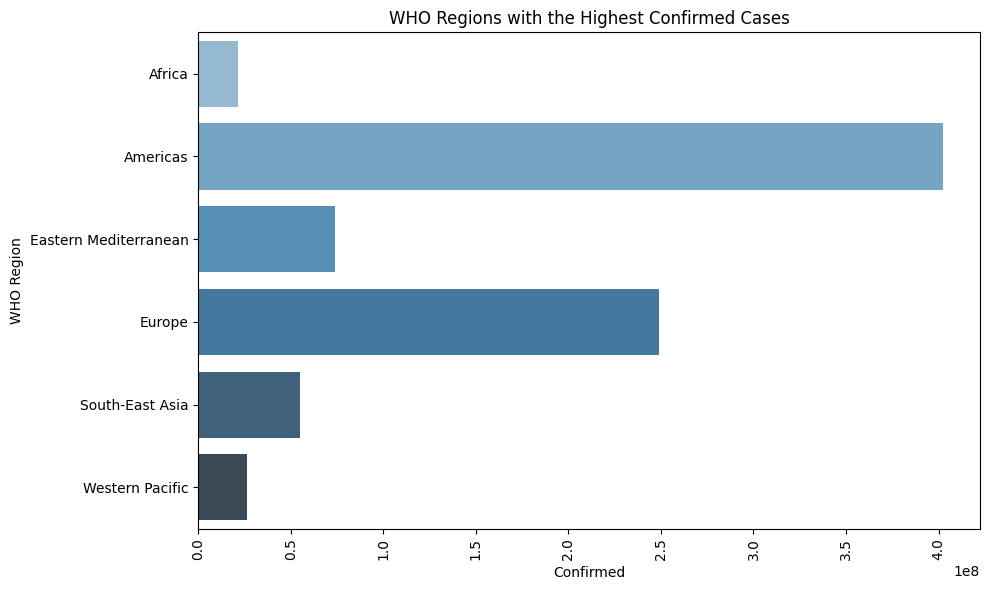

In [ ]:
# to visualise data in terms of who regions using bar plot
who_regions_stats = full_grouped_df.groupby('WHO Region')[numerical_columns].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Confirmed', y='WHO Region', data=who_regions_stats, palette= 'Blues_d')
plt.title('WHO Regions with the Highest Confirmed Cases')
plt.xlabel('Confirmed')
plt.ylabel('WHO Region')
plt.grid(False)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



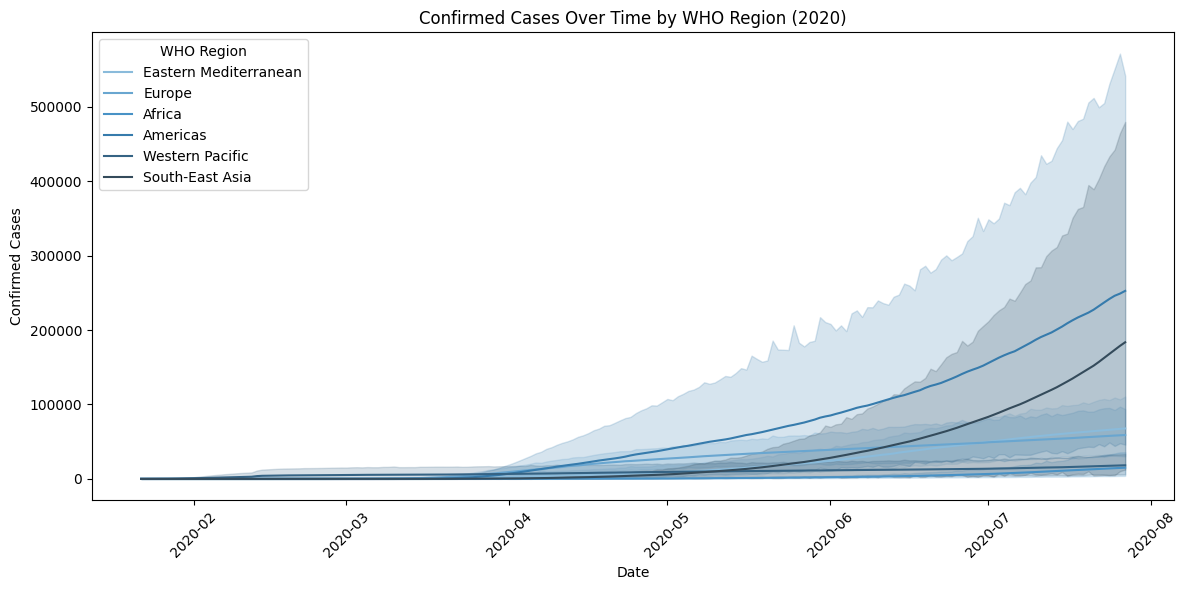

In [ ]:
# to visualise confirmed, deaths, and recovered over Time by WHO for year 2020 using line plot

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Confirmed', hue='WHO Region', data=full_grouped_df[full_grouped_df['Date'].dt.year == 2020], palette= 'Blues_d')
plt.title('Confirmed Cases Over Time by WHO Region (2020)')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.legend(title='WHO Region', loc='upper left')
plt.tight_layout()
plt.show()



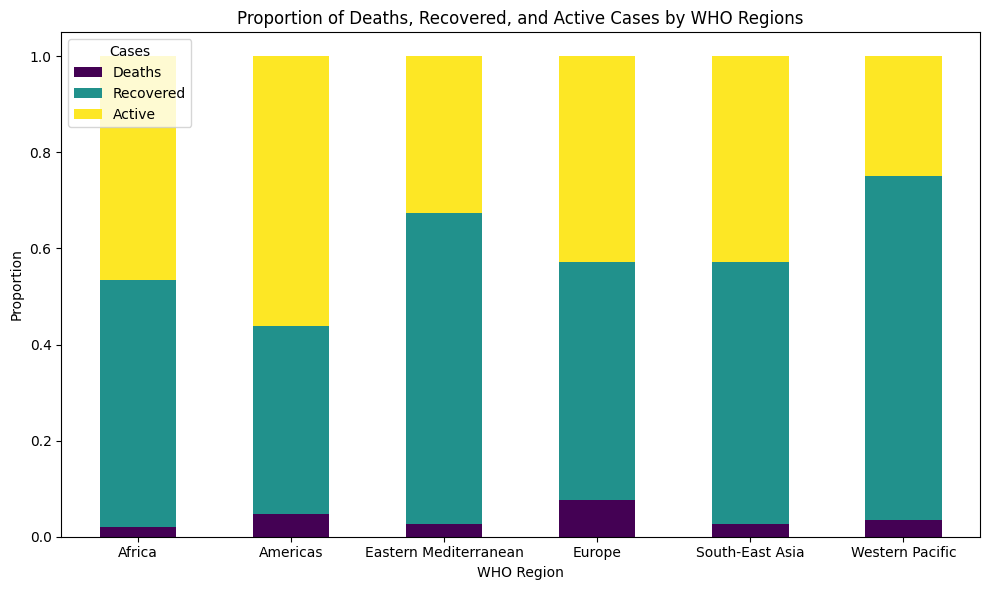

In [ ]:
# to visualise proportion of deaths, Recovered, and Active cases by WHO Regions

region_stats = full_grouped_df.groupby('WHO Region')[['Deaths', 'Recovered', 'Active']].sum()
regions_stats_percentage = region_stats.div(region_stats.sum(axis=1), axis=0)

regions_stats_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), colormap = 'viridis')
plt.title('Proportion of Deaths, Recovered, and Active Cases by WHO Regions')
plt.xlabel('WHO Region')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Cases', loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# to check for daily growth rate

growth_features = ['Confirmed', 'Deaths', 'Recovered', 'Active']
for feature in growth_features:
    full_grouped_df[f'Daily {feature}'] = full_grouped_df.groupby('Country/Region')[feature].diff()
full_grouped_df.tail()




,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,Daily Confirmed,Daily Deaths,Daily Recovered,Daily Active
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791.0,152,2.0,0.0,Eastern Mediterranean,152.0,2.0,0.0,150.0
35152,2020-07-27,Western Sahara,10,1,8,1.0,0,0.0,0.0,Africa,0.0,0.0,0.0,0.0
35153,2020-07-27,Yemen,1691,483,833,375.0,10,4.0,36.0,Eastern Mediterranean,10.0,4.0,36.0,-30.0
35154,2020-07-27,Zambia,4552,140,2815,1597.0,71,1.0,465.0,Africa,71.0,1.0,465.0,-395.0
35155,2020-07-27,Zimbabwe,2704,36,542,2126.0,192,2.0,24.0,Africa,192.0,2.0,24.0,166.0


In [ ]:
# to calculate mortality ratio

full_grouped_df['mortality ratio'] = full_grouped_df['Deaths'] / full_grouped_df['Confirmed']
full_grouped_df.tail()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,Daily Confirmed,Daily Deaths,Daily Recovered,Daily Active,mortality_ratio,Recovery ratio,mortality ratio
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791.0,152,2.0,0.0,Eastern Mediterranean,152.0,2.0,0.0,150.0,0.007344,0.353262,0.007344
35152,2020-07-27,Western Sahara,10,1,8,1.0,0,0.0,0.0,Africa,0.0,0.0,0.0,0.0,0.100000,0.800000,0.100000
35153,2020-07-27,Yemen,1691,483,833,375.0,10,4.0,36.0,Eastern Mediterranean,10.0,4.0,36.0,-30.0,0.285630,0.492608,0.285630
35154,2020-07-27,Zambia,4552,140,2815,1597.0,71,1.0,465.0,Africa,71.0,1.0,465.0,-395.0,0.030756,0.618409,0.030756
35155,2020-07-27,Zimbabwe,2704,36,542,2126.0,192,2.0,24.0,Africa,192.0,2.0,24.0,166.0,0.013314,0.200444,0.013314


In [ ]:
# to calculate recovery ratio

full_grouped_df['Recovery ratio'] = full_grouped_df['Recovered']/ full_grouped_df['Confirmed']
full_grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             35156 non-null  datetime64[ns]
 1   Country/Region   35156 non-null  object        
 2   Confirmed        35156 non-null  int64         
 3   Deaths           35156 non-null  int64         
 4   Recovered        35156 non-null  int64         
 5   Active           35156 non-null  float64       
 6   New cases        35156 non-null  int64         
 7   New deaths       35156 non-null  float64       
 8   New recovered    35156 non-null  float64       
 9   WHO Region       35156 non-null  object        
 10  Daily Confirmed  34969 non-null  float64       
 11  Daily Deaths     34969 non-null  float64       
 12  Daily Recovered  34969 non-null  float64       
 13  Daily Active     34969 non-null  float64       
 14  mortality_ratio  27138 non-null  float

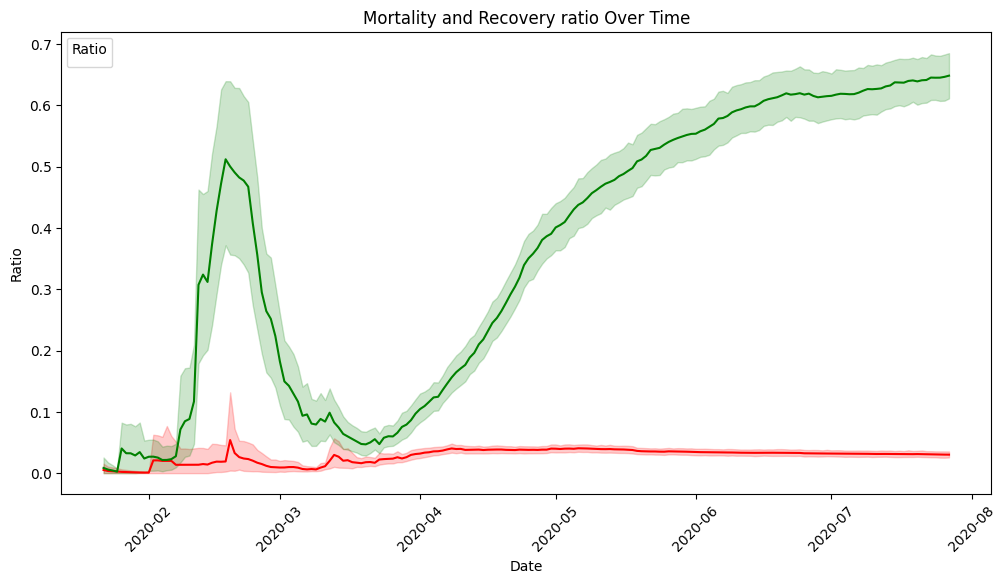

In [ ]:
# to visualise mortality and recovery ratio over time

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='mortality ratio', data=full_grouped_df, color='red')
sns.lineplot(x='Date', y='Recovery ratio', data=full_grouped_df, color='green')
plt.title('Mortality and Recovery ratio Over Time')
plt.xlabel('Date')
plt.ylabel('Ratio')


plt.legend(title='Ratio', fontsize='small', loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout
plt.show()

In [ ]:
from logging import log
# to apply log transformation to numeric columns

import numpy as np

log_columns = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered']

for col in log_columns:
    full_grouped_df[f'log_{col}'] = np.log1p(full_grouped_df[col])

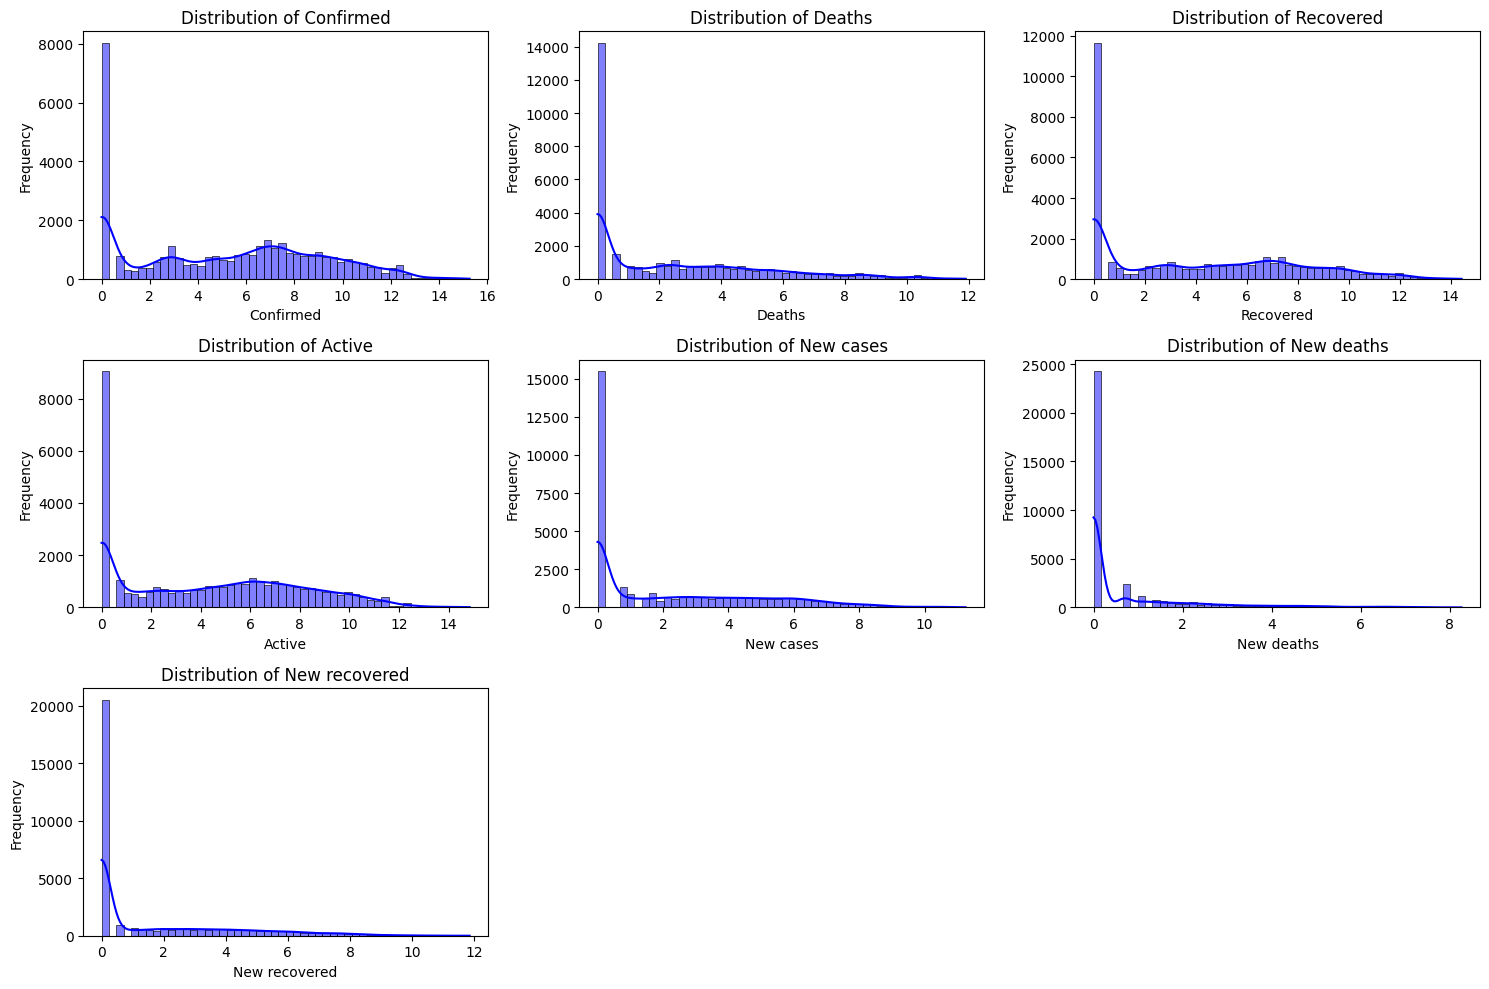

In [ ]:
# plot the log transformed data

plt.figure(figsize=(15, 10))
for i, col in enumerate(log_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(full_grouped_df[f'log_{col}'], kde=True, color='blue', bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

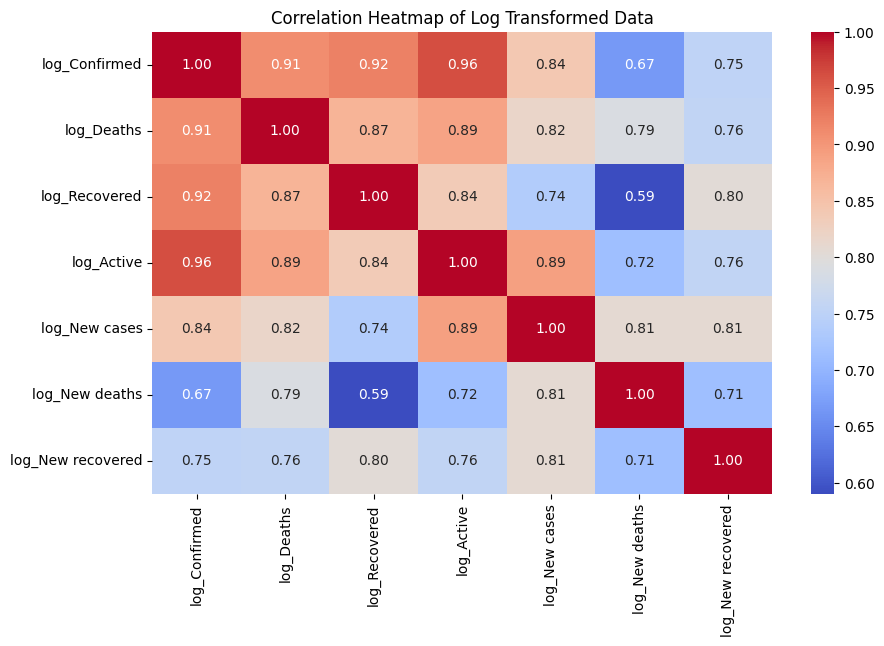

In [ ]:
# to plot a correlation heat map of log data

plt.figure(figsize=(10, 6))
correlation_matrix = full_grouped_df[['log_Confirmed', 'log_Deaths', 'log_Recovered', 'log_Active', 'log_New cases', 'log_New deaths', 'log_New recovered']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Log Transformed Data')
plt.show()

In [ ]:
# to preprocess dataset for model building

from sklearn.preprocessing import StandardScaler

# to standardize the log transformed columns

scaler = StandardScaler()
standardized_columns = ['log_Confirmed', 'log_Deaths', 'log_Recovered', 'log_Active', 'log_New cases', 'log_New deaths', 'log_New recovered']
full_grouped_df[standardized_columns] = scaler.fit_transform(full_grouped_df[standardized_columns])
full_grouped_df.tail()


,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,...,mortality_ratio,Recovery ratio,mortality ratio,log_Confirmed,log_Deaths,log_Recovered,log_Active,log_New cases,log_New deaths,log_New recovered
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791.0,152,2.0,0.0,Eastern Mediterranean,...,0.007344,0.353262,0.007344,1.055661,0.650669,1.100583,1.208968,1.028387,0.267372,-0.681971
35152,2020-07-27,Western Sahara,10,1,8,1.0,0,0.0,0.0,Africa,...,0.100000,0.800000,0.100000,-0.700804,-0.640102,-0.491816,-1.017210,-0.869960,-0.515579,-0.681971
35153,2020-07-27,Yemen,1691,483,833,375.0,10,4.0,36.0,Eastern Mediterranean,...,0.285630,0.492608,0.285630,0.586179,1.287096,0.703591,0.416584,0.034939,0.631423,0.824915
35154,2020-07-27,Zambia,4552,140,2815,1597.0,71,1.0,465.0,Africa,...,0.030756,0.618409,0.030756,0.839159,0.854069,1.024769,0.812766,0.743934,-0.021592,1.882083
35155,2020-07-27,Zimbabwe,2704,36,542,2126.0,192,2.0,24.0,Africa,...,0.013314,0.200444,0.013314,0.706089,0.384344,0.590326,0.891065,1.116032,0.267372,0.661310


In [ ]:
# drop columns without log

columns_to_drop = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered']
full_grouped_df.drop(columns=columns_to_drop, inplace=True)
full_grouped_df.tail()

,Date,Country/Region,WHO Region,Daily Confirmed,Daily Deaths,Daily Recovered,Daily Active,mortality_ratio,Recovery ratio,mortality ratio,log_Confirmed,log_Deaths,log_Recovered,log_Active,log_New cases,log_New deaths,log_New recovered
35151,2020-07-27,West Bank and Gaza,Eastern Mediterranean,152.0,2.0,0.0,150.0,0.007344,0.353262,0.007344,1.055661,0.650669,1.100583,1.208968,1.028387,0.267372,-0.681971
35152,2020-07-27,Western Sahara,Africa,0.0,0.0,0.0,0.0,0.100000,0.800000,0.100000,-0.700804,-0.640102,-0.491816,-1.017210,-0.869960,-0.515579,-0.681971
35153,2020-07-27,Yemen,Eastern Mediterranean,10.0,4.0,36.0,-30.0,0.285630,0.492608,0.285630,0.586179,1.287096,0.703591,0.416584,0.034939,0.631423,0.824915
35154,2020-07-27,Zambia,Africa,71.0,1.0,465.0,-395.0,0.030756,0.618409,0.030756,0.839159,0.854069,1.024769,0.812766,0.743934,-0.021592,1.882083
35155,2020-07-27,Zimbabwe,Africa,192.0,2.0,24.0,166.0,0.013314,0.200444,0.013314,0.706089,0.384344,0.590326,0.891065,1.116032,0.267372,0.661310


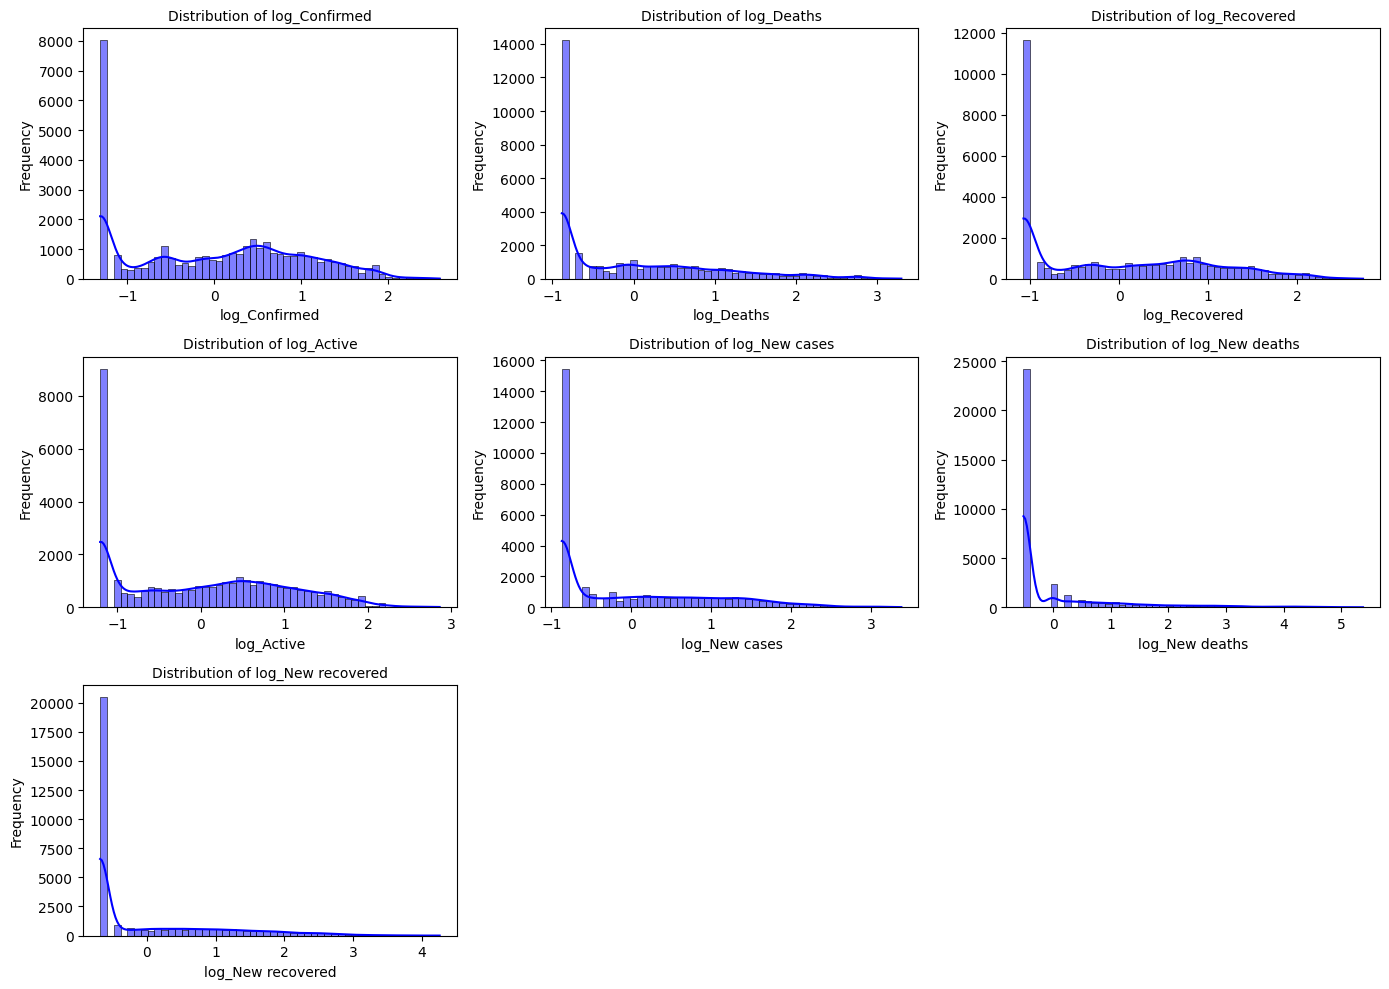

In [ ]:
# to visualise the numeric columns

numerical_columns = ['log_Confirmed', 'log_Deaths', 'log_Recovered', 'log_Active', 'log_New cases', 'log_New deaths', 'log_New recovered']
# to plot their histogram
figure = plt.figure(figsize=(14, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(full_grouped_df[col], kde=True, color='blue', bins=50)
    plt.title(f'Distribution of {col}', fontsize = 10)
    plt.xlabel(col)
    plt.ylabel('Frequency', fontsize = 10)

plt.tight_layout()
plt.show()

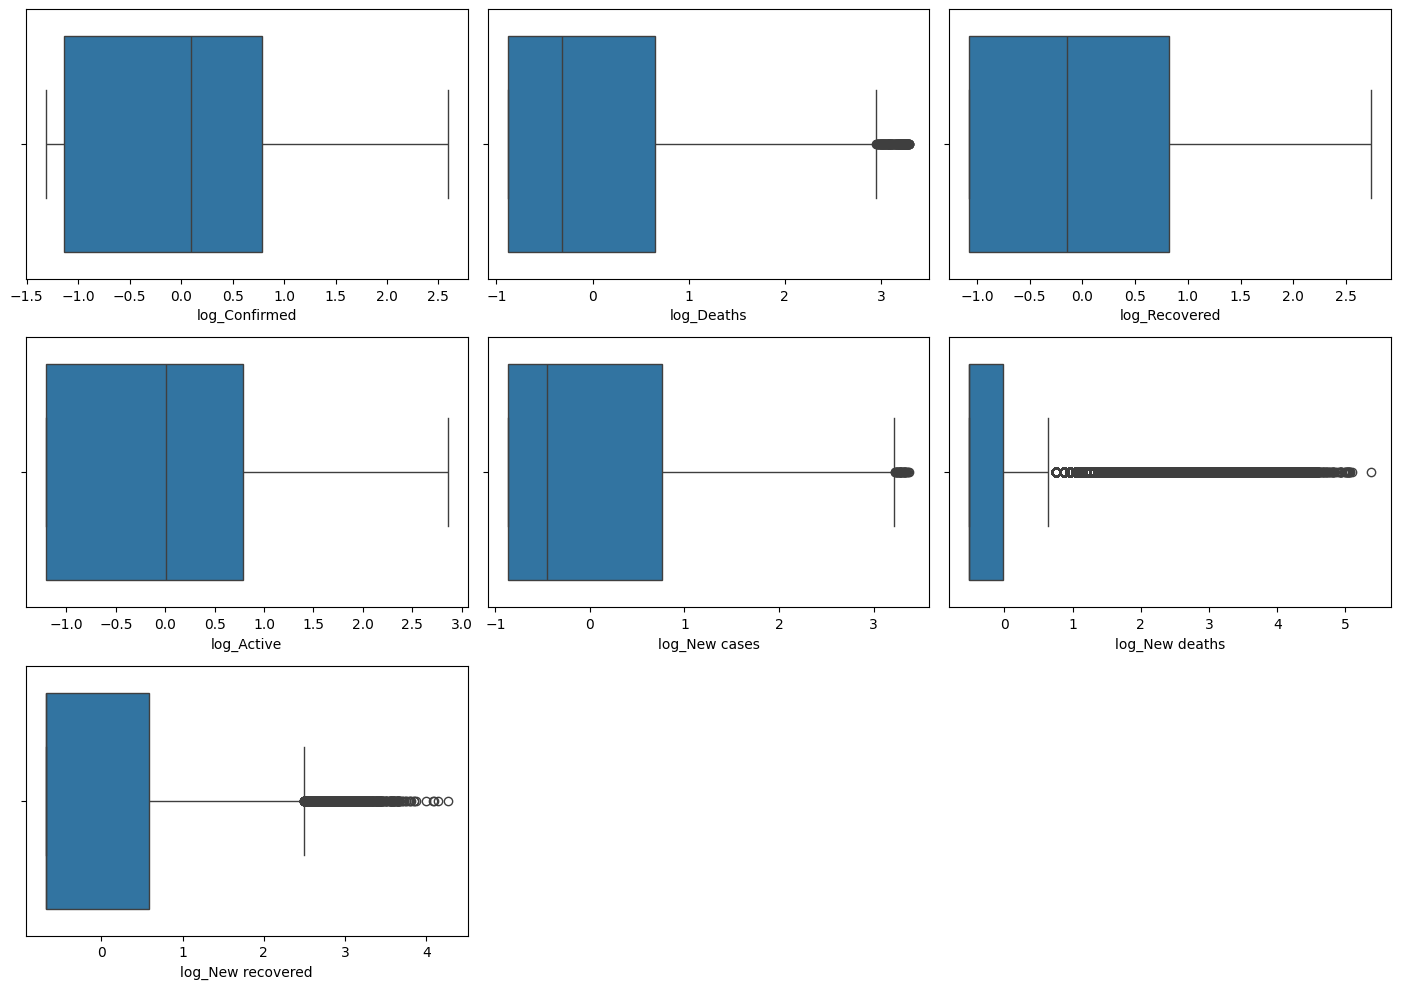

In [ ]:
# boxplots of all numeric variable

plt.figure(figsize=(14, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=full_grouped_df[col])
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

column = 'log_New cases'
series = full_grouped_df[column]

# running adfuler test
adf_test = adfuller(series)
adf_result = pd.Series(adf_test[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])
for key, value in adf_test[4].items():
    adf_result[f'Critical Value ({key})'] = value
print(f'adf_test result is \n{adf_result}')

adf_test result is 
Test Statistic                    -4.305279
p-value                            0.000435
Lags Used                         52.000000
Number of Observations Used    35103.000000
Critical Value (1%)               -3.430536
Critical Value (5%)               -2.861622
Critical Value (10%)              -2.566814
dtype: float64


In [ ]:
model = ARIMA(series, order=(1, 1, 1))
model_fit = model.fit()

# forecast 20 steps

forecast_steps = 20
forecast = model_fit.forecast(steps = forecast_steps)
print(forecast)

35156    0.615326
35157    0.557943
35158    0.551366
35159    0.550613
35160    0.550526
35161    0.550516
35162    0.550515
35163    0.550515
35164    0.550515
35165    0.550515
35166    0.550515
35167    0.550515
35168    0.550515
35169    0.550515
35170    0.550515
35171    0.550515
35172    0.550515
35173    0.550515
35174    0.550515
35175    0.550515
Name: predicted_mean, dtype: float64


In [ ]:
print("\nARIMA Model Summary:")
print(model_fit.summary())


ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:          log_New cases   No. Observations:                35156
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -44610.439
Date:                Sat, 30 Nov 2024   AIC                          89226.878
Time:                        22:41:31   BIC                          89252.281
Sample:                             0   HQIC                         89234.968
                              - 35156                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1146      0.005     24.903      0.000       0.106       0.124
ma.L1         -0.9977      0.000  -2533.645      0.000      -0.998      -0.997
sigma2         0.7407      0.0

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# to calculate rmse

rmse = np.sqrt(mean_squared_error(series, model_fit.fittedvalues))
print(f'RMSE: {rmse}')

RMSE: 0.8606676506006046


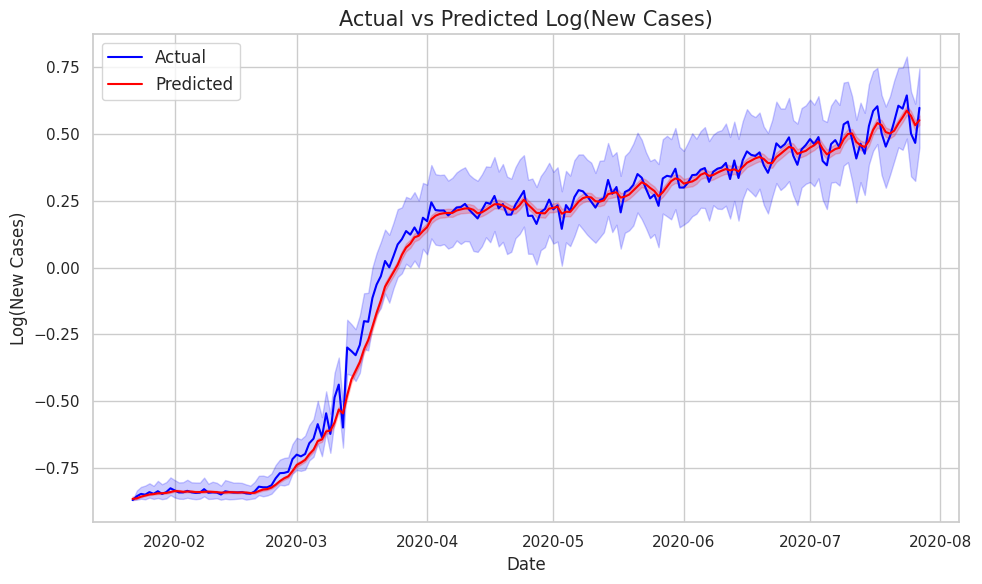

In [ ]:
# plot a graph to show the model perfomance using seaborn

sns.set_theme(style= 'whitegrid')

plt.figure(figsize = (10, 6))

# plot actual values
sns.lineplot(x=full_grouped_df['Date'], y = full_grouped_df['log_New cases'], label = 'Actual', color = 'blue')

# plot predicted values

sns.lineplot(x=full_grouped_df['Date'], y = model_fit.predict(), label = 'Predicted', color = 'red')

plt.title('Actual vs Predicted Log(New Cases)', fontsize = 15)
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Log(New Cases)', fontsize = 12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()






Observations

A Good Fit:

The predicted values (red line) closely follow the actual values (blue line), indicating the ARIMA(1, 1, 1) model captures the trends and patterns well. This suggest a well-calibrated model for forecasting.

Confidence Intervals:

Early in the timeline, the intervals are narrow, reflecting lower uncertainty. As time progresses, the intervals widen, especially towards the later dates. This is expected as future predictions are uncertain.

Seasonal and Trend Patterns:

Both lines rise and fall together, reflecting consistent model performance in capturing underlying trends (e.g., exponential growth in "New Cases" early on, followed by a plateau).

Interpretation of Model Performance
High Agreement:

The close alignment between actual and predicted lines suggests that the model is effectively capturing the dynamics of the data.

Uncertainty:

While confidence intervals widen over time, the predictions remain largely within the bounds, which suggests that the model reliable for short-term forecasting.